In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
yolo = cv2.dnn.readNetFromDarknet("/content/drive/MyDrive/lab4/yolov2.cfg", "/content/drive/MyDrive/lab4/yolov2.weights")

In [ ]:
def read_classes(classes_path):
    with open(classes_path, "r") as f:
        class_names = [line.strip() for line in f.readlines()]
    return class_names

classes = read_classes("/content/drive/MyDrive/lab4/coco.names")

layer_names = yolo.getLayerNames()
output_layers = [layer_names[i - 1] for i in yolo.getUnconnectedOutLayers()]

In [ ]:
traffic_light = "/content/drive/MyDrive/lab4/traffic_lights.jfif"
car = "/content/drive/MyDrive/lab4/car.jfif"

In [ ]:
border_color = (255, 191, 0)
text_color = (0,255,0)

def detect_object(image):
  img = cv2.imread(image)
  height, width, channels = img.shape

  blob = cv2.dnn.blobFromImage(img, 1/255.0, (416, 416), swapRB=False, crop=False)
  yolo.setInput(blob)
  outputs = yolo.forward(output_layers)
  class_ids = []
  confidences = []
  boxes = []
  for output in outputs:
      for detection in output:
          scores = detection[5:]
          class_id = np.argmax(scores)
          confidence = scores[class_id]
          if confidence > 0.5:
              center_x = int(detection[0] * width)
              center_y = int(detection[1] * height)
              w = int(detection[2] * width)
              h = int(detection[3] * height)
              x = int(center_x - w / 2)
              y = int(center_y - h / 2)

              boxes.append([x, y, w, h])
              confidences.append(float(confidence))
              class_ids.append(class_id)

  indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)
  for i in range(len(boxes)):
      if i in indexes:
          x, y, w, h = boxes[i]
          label = str(classes[class_ids[i]]) + " " + str(round(confidences[i], 3))
          cv2.rectangle(img, (x, y), (x + w, y + h), border_color, 1)
          cv2.putText(img, label, (x, y - 20), cv2.FONT_HERSHEY_PLAIN, 2, text_color, 2)

  plt.imshow(img)

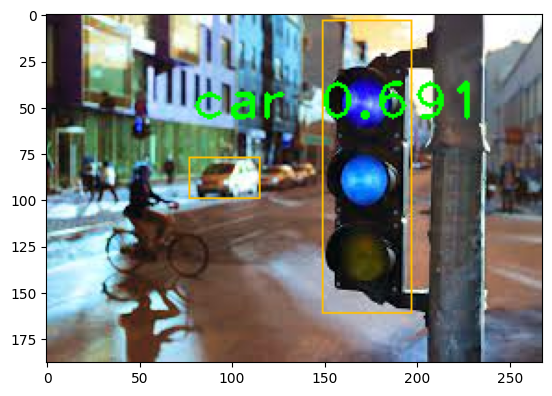

In [ ]:
detect_object(traffic_light)

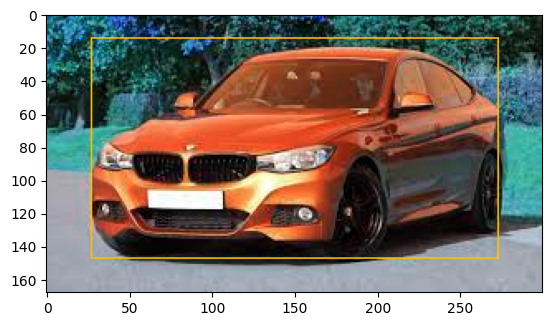

In [ ]:
detect_object(car)